In [178]:
import argparse
from skimage import io
from scipy.fftpack import dct, idct
import numpy as np

def handle_input(filename):
    '''
        Converts filename into rgb matrix (or rgba depending on input image)
        input   : string => filename
        ouptut  : [[(r,g,b)]] or [[(r,g,b,a)]] => 2d matrix where each element is a tuple of r, g, b (or RGBA)
    '''
    
    return io.imread(filename)/255
    

def handle_output(rgb_matrix, output_filename):
    '''
        Converts rgb (or rgba depending on input image) matrix into image file
        input    : [[(r,g,b)]] or [[(r,g,b,a)]] => 2d matrix where each element is a tuple of r, g, b (or RGBA)
                   string => filename
    '''
    
    io.imsave(output_filename,rgb_matrix)
    

def encrypt(placeholder_image, to_hide_image, encryption_method, output_filename):
    '''
        Encrypts to_hide_image into placeholder method using encryption_method and outputs encrypted file as output_filename
        input    : string => placeholder filename
                   string => filename of image to hide
                   string => encryption method chosen
                   string => filename of output image
    '''
    
    placeholder_rgb = handle_input(placeholder_image)
    to_hide_rgb = handle_input(to_hide_image)
    #print(to_hide_rgb)
    encryption_parameter = 0.01
    
    dct_image = dct(placeholder_rgb, norm='ortho') + (encryption_parameter * to_hide_rgb)
    encrypted_rgb = idct(dct_image, norm='ortho')
    
    handle_output(encrypted_rgb, output_filename)

In [179]:
def decrypt(placeholder_image, encrypted_image, encryption_method, output_filename):
    '''
        Encrypts to_hide_image into placeholder method using encryption_method and outputs encrypted file as output_filename
        input    : string => filename of encrypted image
                   string => encryption method chosen
                   string => filename of output image
    '''
    placeholder_rgb = handle_input(placeholder_image)
    encrypted_rgb = handle_input(encrypted_image)
    
    encryption_parameter = 0.01
    #alpha = encrypted_rgb[0][0][3]
    #print(encrypted_rgb)
    decrypted_rgb = (dct(encrypted_rgb, norm='ortho') - dct(placeholder_rgb, norm='ortho'))/encryption_parameter
    #print('After')
    #decrypted_rgb[:,:,3] = 1
    #print(decrypted_rgb)
    io.imshow(decrypted_rgb)
    handle_output(decrypted_rgb, output_filename)

In [180]:
encrypt('bunny.png', 'cube.png', '', 'test.png')

Lossy conversion from float64 to uint8. Range [0.0027157148300435627, 1.0013409734542598]. Convert image to uint8 prior to saving to suppress this warning.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.39215686274511885, 1.2369890313329384]. Convert image to uint8 prior to saving to suppress this warning.


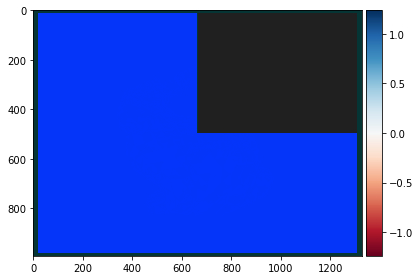

In [181]:
decrypt('bunny.png', 'test.png','', 'hidden_chocolate.png')